In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

#244_GDB9_f32True_grid0_backendipu_0_27768 +16 
cols = "SMILE,ATOMS,Position 0,Position 1,Position 2,Position 3,Position 4,Position 5,Position 6,Position 7,Position 8,Position 9,Position 10,Position 11,Position 12,Position 13,Position 14,Position 15,Position 16,Position 17,Position 18,Position 19,Position 20,Position 21,Position 22,Position 23,Position 24,Position 25,Position 26,Energy 0,Energy 1,Energy 2,Energy 3,Energy 4,Energy 5,Energy 6,Energy 7,Energy 8,Energy 9,Energy 10,Energy 11,Energy 12,Energy 13,Energy 14,Energy 15,Energy 16,Energy 17,Energy 18,Energy 19,Energy 20,Energy 21,Energy 22,Energy 23,Energy 24,Energy 25,Energy 26,Energy 27,Energy 28,Energy 29,Energy 30,Energy 31,Energy 32,Energy 33,Energy 34,Energy 35,Energy 36,Energy 37,Energy 38,Energy 39,Energy 40,Energy 41,Energy 42,Energy 43,Energy 44,Energy 45,Energy 46,Energy 47,Energy 48,Energy 49,Nuclear Energy,Time 0,Time 1,Time 2,Time 3,Time 4,Time 5,Time 6,Time 7,Time 8,Time 9,Time 10,Time 11,Time PySCF,Energy PySCF".split(",")
ipu = pd.DataFrame(np.load("gdb9_f32_ipu_3_23_2023.npz", allow_pickle=True)["data"], columns=cols[:-2])
cpu = pd.DataFrame(np.load("gdb9_f64_cpu_3_23_2023.npz", allow_pickle=True)["data"], columns=cols)
cpu32 = pd.DataFrame(np.load("gdb9_f32_cpu_3_23_2023.npz", allow_pickle=True)["data"], columns=cols[:-2])

hartree_to_eV    = 27.2114
print(cpu.shape, cpu32.shape, ipu.shape)

(529, 94) (286, 92) (87926, 92)


In [46]:
#263_GDB9_f32False_grid0_backendcpu_0_27768 ;; 273_GDB9_f32False_grid0_backendcpu_416535_444303
#302_GDB9_f32True_grid0_backendcpu_0_27768
import os
from natsort import natsorted 

# fetch gdb9_f32True_grid0_backend_ipu 
# fetch gdb9_f32True_grid0_backend_cpu
# fetch gdb9_f32False_grid0_backend_cpu

folders = [a for a in os.listdir("../data/generated/") if ".py" not in a 
                                          and (
                                            "GDB9_f32True_grid0_backendipu" in a or 
                                            "GDB9_f32True_grid0_backendcpu" in a or 
                                            "GDB9_f32False_grid0_backendcpu" in a 
                                          ) 
                                          ]

last_type = -1
runs = []

for num, folder in enumerate(reversed(natsorted(folders))):

  current_type = "_".join(folder.split("_")[1:4])
  if current_type != last_type: 
    if num > 0: runs.append(lst)
    lst = []

  if os.path.exists("../data/generated/%s/data.csv"%folder): lst.append(folder)

  last_type = current_type

for run in runs: 
  print(len(run), [os.path.getsize("../data/generated/%s/data.csv"%f) for f in run])
  #print(folder, os.path.getsize("../data/generated/%s/data.csv"%folder))

runs = [run[:16] for run in runs] # pick the last 16 ones 

for run in runs: 
  print(len(run), [os.path.getsize("../data/generated/%s/data.csv"%f) for f in run])


32 [4917314, 5334821, 4704038, 4842301, 5306933, 3787641, 4812237, 4886093, 4665500, 7534115, 4926082, 4631804, 4920591, 4823714, 4673089, 4631698, 262236, 274883, 269578, 412105, 274418, 268006, 264651, 273984, 274115, 263558, 261518, 271019, 274439, 261590, 271474, 269122]
16 [3891899, 6384591, 6671592, 6790460, 6460677, 6387335, 6712708, 6367147, 6343120, 6268263, 6372072, 6360491, 6325287, 6360878, 6373543, 6304390]
32 [22888819, 21143249, 22869980, 4572948, 22878511, 22941300, 22986791, 23079193, 16639396, 17260979, 14231106, 22676560, 20798051, 22897151, 22912068, 22881096, 68357, 64895, 66713, 60618, 64968, 98793, 67910, 61681, 68459, 63868, 62514, 63619, 65214, 67187, 61055, 67974]
37 [723281, 984099, 724034, 751459, 775309, 703456, 774027, 727131, 745099, 774490, 705648, 749935, 700361, 720030, 708905, 697689, 6359, 2284, 3623, 942, 942, 0, 942, 942, 0, 942, 942, 942, 0, 942, 942, 942, 942, 942, 0, 0, 942]
16 [4917314, 5334821, 4704038, 4842301, 5306933, 3787641, 4812237, 4886

In [58]:
from datetime import datetime 

# write to numpy arrays
def dump_run(run): 
  dfs = []
  from tqdm import tqdm
  for folder in tqdm(run):
    a = pd.read_csv("../data/generated/%s/data.csv"%folder, skiprows=2) 
    #print(a.values.shape)
    #print(a.head())
    #print(a.shape)
    if np.prod(a.shape)>0:
      dfs.append(a.values)


  type = "_".join(run[0].split("_")[1:5])
  #with open("gdb9_float64_cpu_3_23_2023.csv", "w", newline="") as csvfile: 
  df = np.concatenate(dfs, axis=0) # pd.concat(dfs, axis=0, ignore_index=True, join="outer")
  #print(df.shape)
  #print(df[[5,10]])
  date = datetime.today()
  filename = "%s_%i_%i_%i.npz"%(type, date.day, date.month, date.year)
  np.savez( filename , data=df)
  print(df.shape)
  return filename

filenames = []
for run in runs[:3]:
  filenames.append(dump_run(run))

print(filenames)

100%|██████████| 16/16 [00:00<00:00, 17.21it/s]


(59363, 92)


100%|██████████| 16/16 [00:01<00:00, 14.67it/s]


(73036, 94)


100%|██████████| 16/16 [00:03<00:00,  4.96it/s]


(200509, 92)
['GDB9_f32True_grid0_backendcpu_24_3_2023.npz', 'GDB9_f32False_grid0_backendcpu_24_3_2023.npz', 'GDB9_f32True_grid0_backendipu_24_3_2023.npz']


In [59]:
for filename in filenames:
  print(filename)

GDB9_f32True_grid0_backendcpu_24_3_2023.npz
GDB9_f32False_grid0_backendcpu_24_3_2023.npz
GDB9_f32True_grid0_backendipu_24_3_2023.npz


In [68]:
cols = "SMILE,ATOMS,Position 0,Position 1,Position 2,Position 3,Position 4,Position 5,Position 6,Position 7,Position 8,Position 9,Position 10,Position 11,Position 12,Position 13,Position 14,Position 15,Position 16,Position 17,Position 18,Position 19,Position 20,Position 21,Position 22,Position 23,Position 24,Position 25,Position 26,Energy 0,Energy 1,Energy 2,Energy 3,Energy 4,Energy 5,Energy 6,Energy 7,Energy 8,Energy 9,Energy 10,Energy 11,Energy 12,Energy 13,Energy 14,Energy 15,Energy 16,Energy 17,Energy 18,Energy 19,Energy 20,Energy 21,Energy 22,Energy 23,Energy 24,Energy 25,Energy 26,Energy 27,Energy 28,Energy 29,Energy 30,Energy 31,Energy 32,Energy 33,Energy 34,Energy 35,Energy 36,Energy 37,Energy 38,Energy 39,Energy 40,Energy 41,Energy 42,Energy 43,Energy 44,Energy 45,Energy 46,Energy 47,Energy 48,Energy 49,Nuclear Energy,Time 0,Time 1,Time 2,Time 3,Time 4,Time 5,Time 6,Time 7,Time 8,Time 9,Time 10,Time 11,Time PySCF,Energy PySCF".split(",")

cpu32 = pd.DataFrame(np.load(filenames[0], allow_pickle=True)["data"], columns=cols[:-2])
cpu64 = pd.DataFrame(np.load(filenames[1], allow_pickle=True)["data"], columns=cols)
ipu   = pd.DataFrame(np.load(filenames[2], allow_pickle=True)["data"], columns=cols[:-2])

print(cpu32.shape, cpu64.shape, ipu.shape)

(59363, 92) (73036, 94) (200509, 92)


In [71]:
smiles = np.intersect1d( np.intersect1d(  ipu["SMILE"].tolist() , cpu64["SMILE"].tolist()) , cpu32["SMILE"].tolist() )
print(smiles.shape)

ipu   = ipu  [  ipu["SMILE"].isin(smiles)].sort_values("SMILE")
cpu64 = cpu64[cpu64["SMILE"].isin(smiles)].sort_values("SMILE")
cpu32 = cpu32[cpu32["SMILE"].isin(smiles)].sort_values("SMILE")

print(ipu.shape, cpu64.shape, cpu32.shape)

(58667,)
(58667, 92) (58667, 94) (58667, 92)


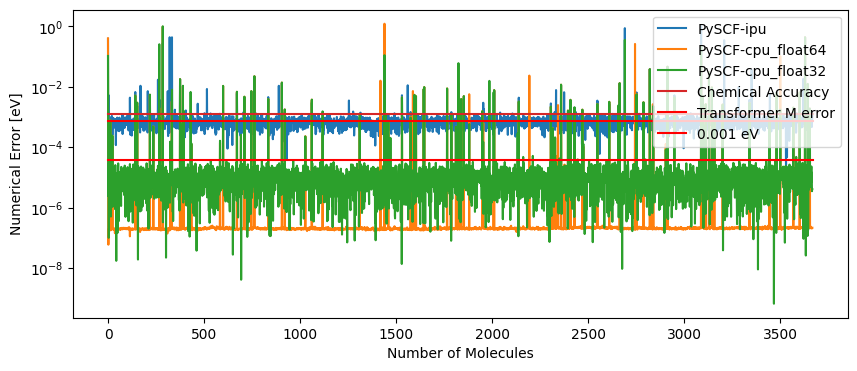

In [82]:
step = 16
fig, ax = plt.subplots(1,1, figsize=(10, 4))
plt.plot(np.abs(cpu64["Energy PySCF"].values - ipu["Energy 49"].values   / hartree_to_eV)[::step],   label="PySCF-ipu")
plt.plot(np.abs(cpu64["Energy PySCF"].values - cpu64["Energy 49"].values / hartree_to_eV)[::step], label="PySCF-cpu_float64")
plt.plot(np.abs(cpu64["Energy PySCF"].values - cpu32["Energy 49"].values / hartree_to_eV)[::step], label="PySCF-cpu_float32")
plt.plot([0, ipu.values[::step].shape[0]], [0.034/hartree_to_eV, 0.034/hartree_to_eV], label="Chemical Accuracy")
plt.plot([0, ipu.values[::step].shape[0]], [0.020/hartree_to_eV, 0.020/hartree_to_eV], 'r', label="Transformer M error")
plt.plot([0, ipu.values[::step].shape[0]], [0.001/hartree_to_eV, 0.001/hartree_to_eV], 'r', label="0.001 eV ")
plt.xlabel("Number of Molecules")
plt.ylabel("Numerical Error [eV]")
plt.legend(loc=1)
plt.yscale("log") # perhaps the spike is caused by initializing without minao? 

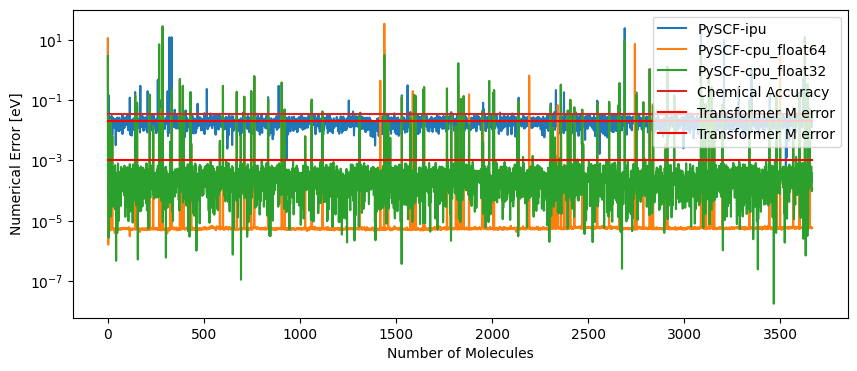

In [80]:
step = 16
fig, ax = plt.subplots(1,1, figsize=(10, 4))
plt.plot(np.abs(cpu64["Energy PySCF"].values*hartree_to_eV - ipu["Energy 49"].values)[::step],   label="PySCF-ipu")
plt.plot(np.abs(cpu64["Energy PySCF"].values*hartree_to_eV - cpu64["Energy 49"].values)[::step], label="PySCF-cpu_float64")
plt.plot(np.abs(cpu64["Energy PySCF"].values*hartree_to_eV - cpu32["Energy 49"].values)[::step], label="PySCF-cpu_float32")
plt.plot([0, ipu.values[::step].shape[0]], [0.034, 0.034], label="Chemical Accuracy")
plt.plot([0, ipu.values[::step].shape[0]], [0.020, 0.020], 'r', label="Transformer M error")
plt.plot([0, ipu.values[::step].shape[0]], [0.001, 0.001], 'r', label="0.001 eV ")
plt.xlabel("Number of Molecules")
plt.ylabel("Numerical Error [eV]")
plt.legend(loc=1)
plt.yscale("log") # perhaps the spike is caused by initializing without minao? 

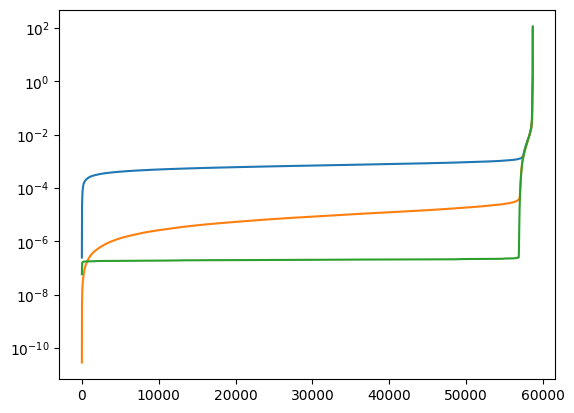

In [93]:
#fig, ax = plt.subplots(1,1, figsize=(10, 4))
#plt.hist(np.abs(cpu64["Energy PySCF"].values*hartree_to_eV - ipu["Energy 49"].values).reshape(-1),   bins=100, label="PySCF-ipu")
#plt.hist(np.abs(cpu64["Energy PySCF"].values*hartree_to_eV - cpu64["Energy 49"].values).reshape(-1), bins=100, label="PySCF-cpu_float64")
#plt.hist(np.abs(cpu64["Energy PySCF"].values*hartree_to_eV - cpu32["Energy 49"].values).reshape(-1), bins=100, label="PySCF-cpu_float32")
#plt.xscale("log")
diff = np.abs(cpu64["Energy PySCF"].values- ipu["Energy 49"].values/hartree_to_eV).reshape(-1)
plt.plot(np.sort(diff))

diff = np.abs(cpu64["Energy PySCF"].values- cpu32["Energy 49"].values/hartree_to_eV).reshape(-1)
plt.plot(np.sort(diff))

diff = np.abs(cpu64["Energy PySCF"].values- cpu64["Energy 49"].values/hartree_to_eV).reshape(-1)
plt.plot(np.sort(diff))

plt.yscale("log")


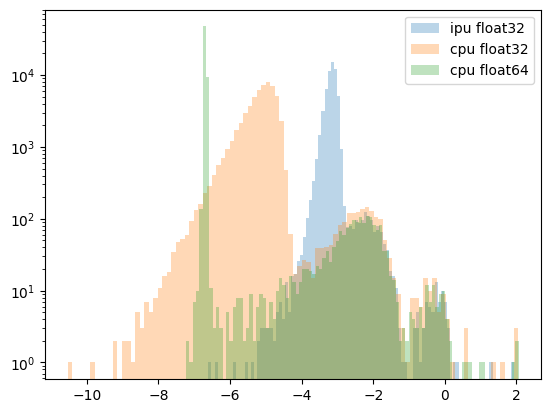

In [114]:
import numpy as np
diff = np.log10(np.abs(cpu64["Energy PySCF"].values - ipu["Energy 49"].values/hartree_to_eV).reshape(-1).astype(np.float64))
plt.hist(diff, bins=100, label="ipu float32", alpha=0.3)

diff = np.log10(np.abs(cpu64["Energy PySCF"].values - cpu32["Energy 49"].values/hartree_to_eV).reshape(-1).astype(np.float64))
plt.hist(diff, bins=100, label="cpu float32", alpha=0.3)

diff = np.log10(np.abs(cpu64["Energy PySCF"].values - cpu64["Energy 49"].values/hartree_to_eV).reshape(-1).astype(np.float64))
plt.hist(diff, bins=100, label="cpu float64", alpha=0.3)
plt.legend()

plt.yscale("log")
print()

ValueError: operands could not be broadcast together with shapes (58667,) (529,) 

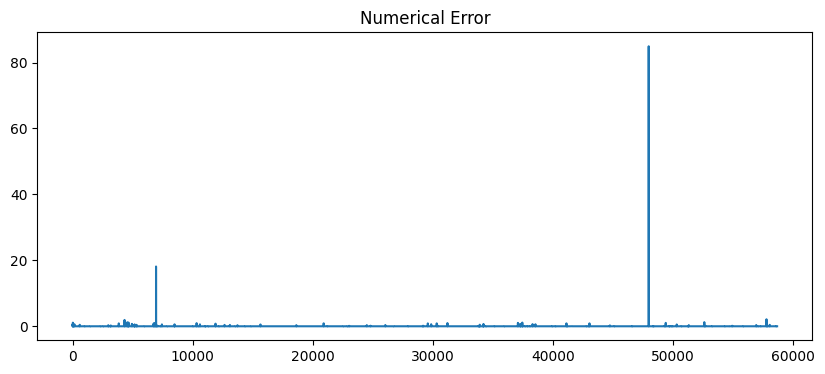

In [73]:

fig, ax = plt.subplots(1,1, figsize=(10, 4))
plt.title("Numerical Error")
plt.plot(np.abs(cpu64["Energy PySCF"].values - ipu["Energy 49"].values/hartree_to_eV),   label="PySCF-ipu")
plt.plot(np.abs(cpu64["Energy PySCF"].values - cpu["Energy 49"].values/hartree_to_eV),   label="PySCF-cpu")
plt.plot(np.abs(cpu64["Energy PySCF"].values - cpu32["Energy 49"].values/hartree_to_eV), label="PySCF-cpu_float32")




plt.plot([0, ipu.values.shape[0]], [0.034/hartree_to_eV, 0.034/hartree_to_eV], label="Chemical Accuracy")
plt.plot([0, ipu.values.shape[0]], [0.020/hartree_to_eV, 0.020/hartree_to_eV], 'r', label="Transformer M error")
plt.xlabel("Number of Molecules")
plt.ylabel("Numerical Error [hartree]")
plt.legend(loc=1)
plt.yscale("log") # perhaps the spike is caused by initializing without minao? 

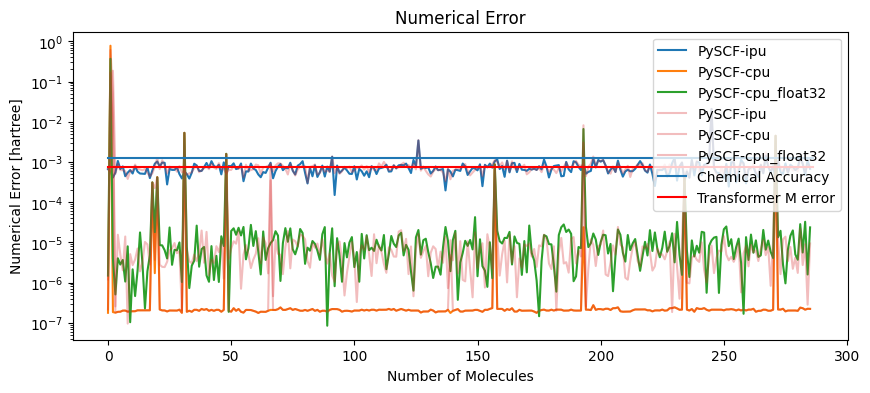

In [10]:

fig, ax = plt.subplots(1,1, figsize=(10, 4))
plt.title("Numerical Error")

plt.plot(np.abs(cpu["Energy PySCF"].values- ipu["Energy 49"].values/hartree_to_eV),  'C0-', label="PySCF-ipu")
plt.plot(np.abs(cpu["Energy PySCF"].values - cpu["Energy 49"].values/hartree_to_eV),  'C1-', label="PySCF-cpu")
plt.plot(np.abs(cpu["Energy PySCF"].values - cpu32["Energy 49"].values/hartree_to_eV), 'C2-',label="PySCF-cpu_float32")



plt.plot(np.abs(cpu["Energy PySCF"].values-  np.mean(ipu[["Energy %i"%i for i in range(40, 49)]].values, axis=1)/hartree_to_eV),  'C3-', label="PySCF-ipu", alpha=0.3)
plt.plot(np.abs(cpu["Energy PySCF"].values - np.mean(cpu[["Energy %i"%i for i in range(40, 49)]].values, axis=1)/hartree_to_eV),  'C3-', label="PySCF-cpu", alpha=0.3)
plt.plot(np.abs(cpu["Energy PySCF"].values - np.mean(cpu32[["Energy %i"%i for i in range(40, 49)]].values, axis=1)/hartree_to_eV), 'C3-', label="PySCF-cpu_float32", alpha=0.3)
plt.plot([0, ipu.values.shape[0]], [0.034/hartree_to_eV, 0.034/hartree_to_eV], label="Chemical Accuracy")
plt.plot([0, ipu.values.shape[0]], [0.020/hartree_to_eV, 0.020/hartree_to_eV], 'r', label="Transformer M error")
plt.xlabel("Number of Molecules")
plt.ylabel("Numerical Error [hartree]")
plt.legend(loc=1)
plt.yscale("log") # perhaps the spike is caused by initializing without minao? 

In [11]:
ipu[["Energy %i"%i for i in range(48, 49)]].values

array([[-8763.499132763673],
       [-9725.431423535156],
       [-9741.269308691406],
       [-8779.526355053711],
       [-9731.530072265625],
       [-9738.226627734375],
       [-10681.055798217774],
       [-10683.43081665039],
       [-9630.32771340332],
       [-9563.375445532229],
       [-9574.83864638672],
       [-9670.135015356444],
       [-10412.512630126954],
       [-10426.108365014648],
       [-10418.737503613282],
       [-10421.514448242187],
       [-10523.719961743163],
       [-10428.347193579102],
       [-11285.815212060548],
       [-11382.938518286132],
       [-11376.796687402344],
       [-11391.249421948243],
       [-10440.129278027343],
       [-10660.165601123048],
       [-9710.327634985351],
       [-10679.255434594726],
       [-10663.14516970215],
       [-10618.451641015625],
       [-10734.840831030277],
       [-11575.477774829102],
       [-8802.625485375976],
       [-9744.750454589845],
       [-9760.76771176758],
       [-10690.48611616211],


In [12]:
np.mean(ipu[["Energy %i"%i for i in range(40, 49)]].values)

-11257.76719300562

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  5.,  4.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  9.,  3.,  6.,  8.,  2.,  2.,  0.,  1.,  0.,
         2.,  9.,  1., 11., 11., 16., 20., 11.,  8.,  2.,  0.,  0.,  0.,
         7.,  7., 29., 28., 14.,  8.,  0.,  0.,  0.,  0.,  0., 14., 19.,
         9.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  8.]),
 array([-18621.53903808, -18522.95885233, -18424.37866658, -18325.79848083,
        -18227.21829508, -18128.63810933, -18030.05792357, -17931.47773782,
        -17832.89755207, -17734.31736632, -17635.73718057, -17537.15699482,
        -17438.57680906, -17339.99662331, -17241.41643756, -17142.83625181,
        -17044.25606606, -16945.67588031, -16847.09569455, -16748.5155088 ,
        -16649.93532305, -16551.3551373 , -16452.77495

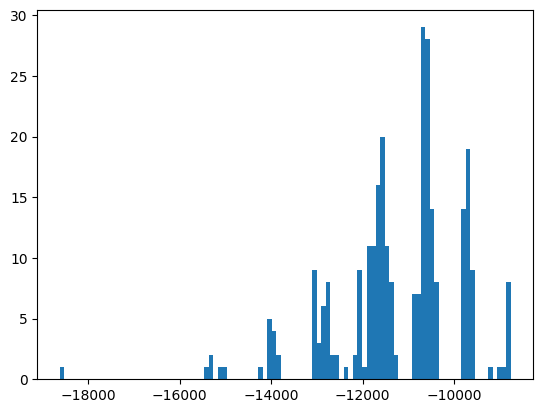

In [13]:
plt.hist(cpu["Energy 49"], bins=100)

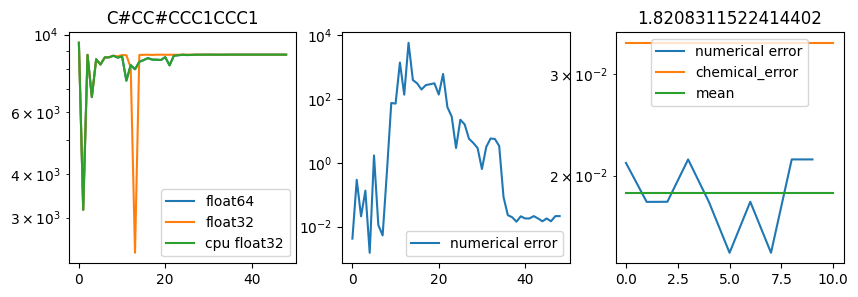

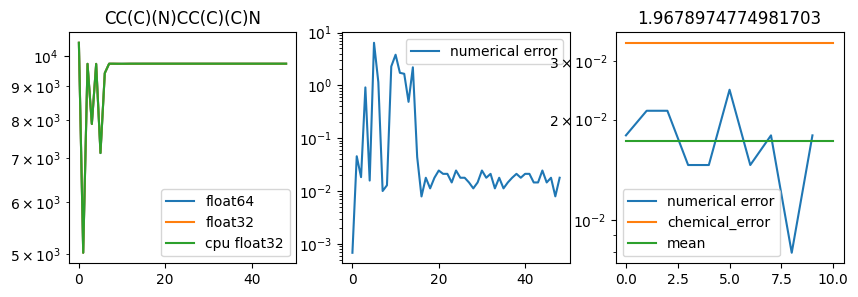

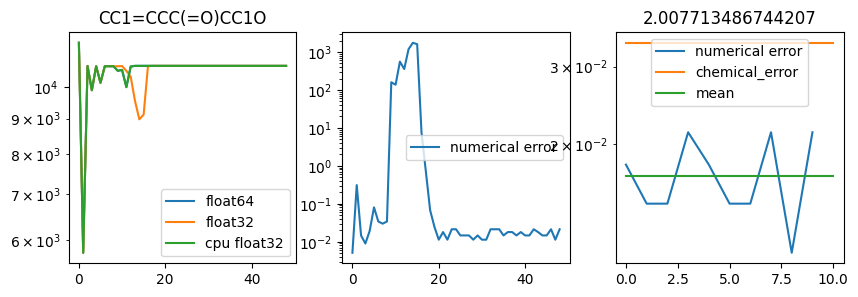

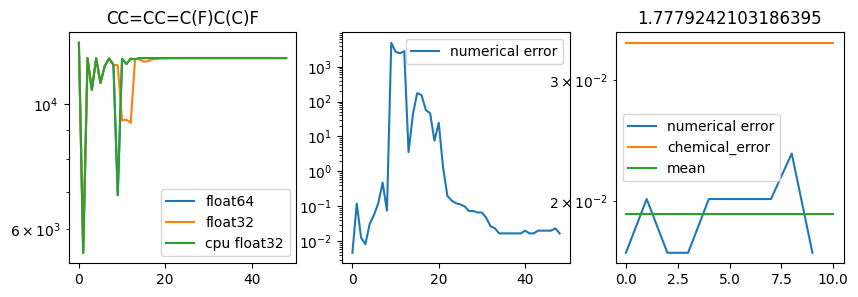

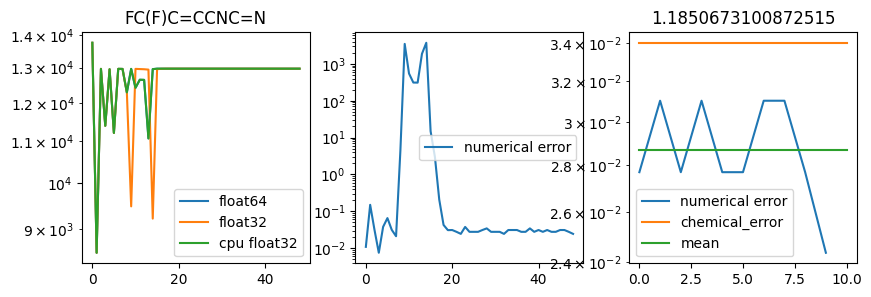

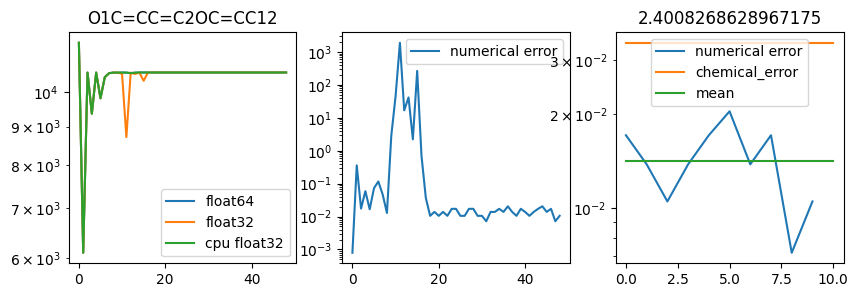

In [14]:
for i in range(0, ipu.shape[0], 50):
    f32 = ipu[["Energy %i"%i for i in range(49)]].values[i]
    f64 = cpu[["Energy %i"%i for i in range(49)]].values[i]
    c32 = cpu32[["Energy %i"%i for i in range(49)]].values[i]

    fig, ax = plt.subplots(1,3, figsize=(10, 3))
    ax[0].plot(np.abs(f64), label="float64")
    ax[0].plot(np.abs(f32), label="float32")
    ax[0].plot(np.abs(c32), label="cpu float32")
    ax[1].plot(np.abs(f64-f32), label="numerical error")
    ax[0].set_title(ipu["SMILE"].values[i])
    #ax[0].plot([0, 50], [0.034, 0.034],label="chemical_error")
    
    
    ax[2].plot(np.abs(f64[-10:]-f32[-10:]), label="numerical error")
    ax[2].plot([0, 10], [0.034, 0.034],label="chemical_error")
    ax[2].plot([0, 10], [np.abs(f64[-1] -np.mean(f32[-10:])), np.abs(f64[-1]-np.mean(f32[-10:]))], label="mean")
    ax[2].set_title(str( 0.034 / (np.abs(f64[-1] -np.mean(f32[-10:]))  ) ))
    for i in range(3): ax[i].legend()
    ax[2].set_yscale("log")
    ax[0].set_yscale("log")
    ax[1].set_yscale("log")
    

5.596219125436619e-06


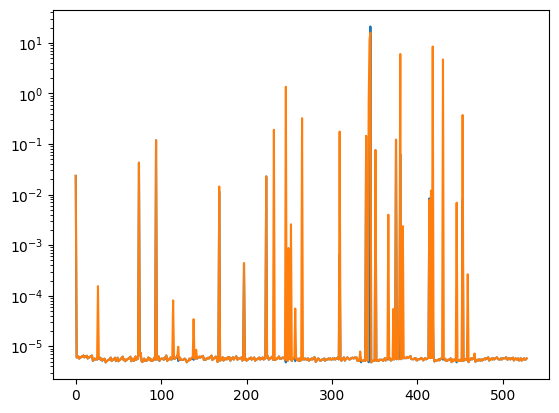

In [15]:
# pyscf vs cpu float64

cpu = pd.DataFrame(np.load("gdb9_f64_cpu_3_23_2023.npz", allow_pickle=True)["data"], columns=cols)
plt.plot( np.abs(  cpu["Energy 49"] - cpu["Energy PySCF"]*hartree_to_eV) )
plt.plot( np.abs(  cpu["Energy 30"] - cpu["Energy PySCF"]*hartree_to_eV) )

print(np.median(cpu["Energy 49"] - cpu["Energy PySCF"]*hartree_to_eV))

plt.yscale("log")

In [16]:
diff = np.abs(  cpu["Energy 30"] - cpu["Energy PySCF"]*hartree_to_eV)

indxs = np.argsort( diff)
indxs = np.flip(indxs)
print(diff[indxs])

345    15.864325
344    11.651583
418      8.48214
380     6.032171
430     4.700655
         ...    
440     0.000005
460     0.000005
130     0.000005
346     0.000005
35      0.000005
Length: 529, dtype: object


In [17]:
for i in indxs[:10]:
    f32 = ipu[["Energy %i"%i for i in range(49)]].values[i]
    f64 = cpu[["Energy %i"%i for i in range(49)]].values[i]
    fig, ax = plt.subplots(1,3, figsize=(10, 3))
    ax[0].plot(np.abs(f64), label="float64")
    ax[0].plot(np.abs(f32), label="float32")
    ax[1].plot(np.abs(f64-f32), label="numerical error")
    ax[0].set_title(ipu["SMILE"].values[i])
    #ax[0].plot([0, 50], [0.034, 0.034],label="chemical_error")
    
    
    ax[2].plot(np.abs(f64[-10:]-f32[-10:]), label="numerical error")
    ax[2].plot([0, 10], [0.034, 0.034],label="chemical_error")
    ax[2].plot([0, 10], [np.abs(f64[-1] -np.mean(f32[-10:])), np.abs(f64[-1]-np.mean(f32[-10:]))], label="mean")
    ax[2].set_title(str( 0.034 / (np.abs(f64[-1] -np.mean(f32[-10:]))  ) ))
    for i in range(3): ax[i].legend()
    ax[2].set_yscale("log")
    ax[0].set_yscale("log")
    ax[1].set_yscale("log")
    

IndexError: index 345 is out of bounds for axis 0 with size 286